## Extension of (4.2) Example 2

In [1]:
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import matplotlib.pyplot as plt
import numpy as np

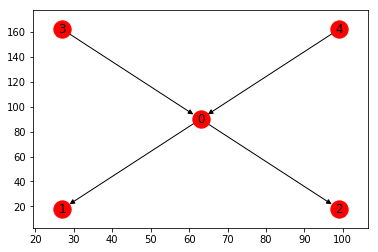

In [2]:
G = nx.DiGraph()
G.add_nodes_from([0,1,2,3,4])
G.add_edges_from([
    (0,1),
    (0,2),
    (3,0),
    (4,0)
])
nx.draw_networkx(G, pos=graphviz_layout(G, prog='dot'))

Reverse the direction of edges connected to the root

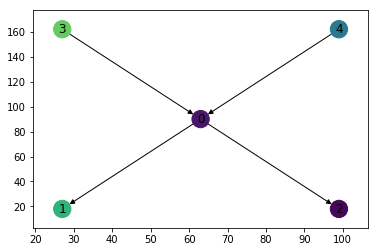

In [3]:
N = nx.number_of_nodes(G)
layout = graphviz_layout(G, prog='dot')
#init = np.random.normal(loc=0, scale=4, size=N)
init = np.random.rand(N)
nx.draw_networkx(G, pos=layout, node_color=init, vmin=0, vmax=1)

Simulate simple consensus

In [4]:
A = nx.adjacency_matrix(G).transpose()
D = np.diag(np.asarray(np.sum(A, axis=1)).reshape(-1))
L = D - A
np.linalg.matrix_rank(L)

3

In [5]:
from scipy.integrate import solve_ivp

In [6]:
f1 = lambda t,x: np.asarray(-L.dot(x))[0]
res1 = solve_ivp(fun=f1, t_span=[0,10], y0=init)

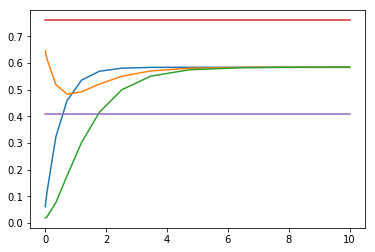

In [7]:
for i in np.arange(0,N):
    plt.plot(res1.t, res1.y[i,:])

In [8]:
res1.y[:,-1]

array([0.58346986, 0.58441605, 0.58437805, 0.76034698, 0.40756698])

### Symmetrization

In [9]:
from scipy.linalg import null_space
from scipy.linalg import solve_lyapunov

In [10]:
Q = null_space(null_space(L).transpose()).transpose()
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [11]:
f2 = lambda t,x: -eqL.dot(x)
res2 = solve_ivp(fun=f2, t_span=[0,10], y0=init)

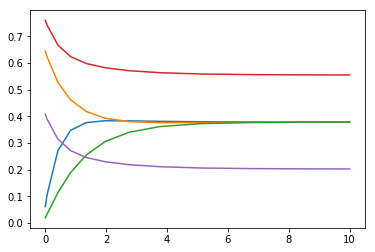

In [12]:
for i in np.arange(0,N):
    plt.plot(res2.t, res2.y[i,:], label=i)

Create undirected graph from the equivalent Laplacian

In [13]:
eqG = nx.Graph()

for i in np.arange(0,np.shape(eqL)[0]):
    for j in np.arange(i+1,np.shape(eqL)[1]):
        eqG.add_edge(i,j,weight=eqL[i,j])

In [14]:
nx.is_connected(eqG)

True

In [15]:
np.sum(eqL, axis=1)

array([ 1.11022302e-16, -4.16333634e-17,  2.08166817e-16,  0.00000000e+00,
        0.00000000e+00])

In [16]:
eqL

array([[ 1.86885246, -0.3442623 , -0.3442623 , -0.59016393, -0.59016393],
       [-0.3442623 ,  0.72131148, -0.27868852, -0.04918033, -0.04918033],
       [-0.3442623 , -0.27868852,  0.72131148, -0.04918033, -0.04918033],
       [-0.59016393, -0.04918033, -0.04918033,  0.3442623 ,  0.3442623 ],
       [-0.59016393, -0.04918033, -0.04918033,  0.3442623 ,  0.3442623 ]])

In [17]:
np.diag(eqL)

array([1.86885246, 0.72131148, 0.72131148, 0.3442623 , 0.3442623 ])

In [18]:
res2.y[:,-1]

array([0.37832738, 0.37821139, 0.3781792 , 0.55499414, 0.20221414])

Final result

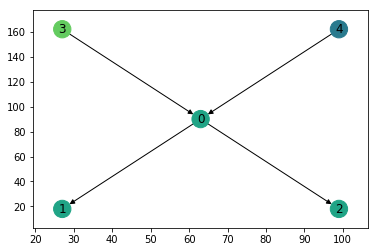

In [19]:
nx.draw_networkx(G, node_color = res1.y[:,-1], pos=layout, vmin=0, vmax=1)

In [20]:
np.linalg.matrix_rank(eqL)

3

In [21]:
negG = nx.Graph()

for i in np.arange(0,N):
    for j in np.arange(i+1,N):
        if(eqL[i,j] < -1e-6):
            negG.add_edge(i,j)

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


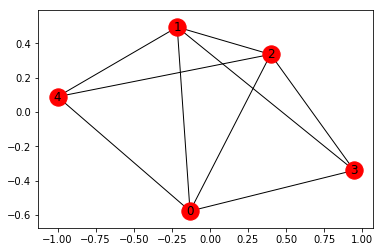

In [22]:
nx.draw_networkx(negG)

In [23]:
posG = nx.Graph()

for i in np.arange(0,N):
    for j in np.arange(i+1,N):
        if(eqL[i,j] > 1e-6):
            posG.add_edge(i,j)

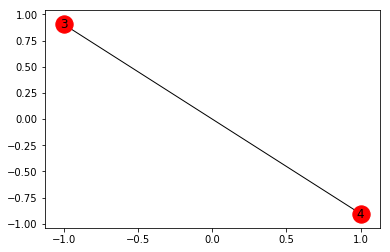

In [24]:
nx.draw_networkx(posG)